In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Concrete_Data_Yeh.csv")

In [3]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


    Name -- Data Type -- Measurement -- Description
    
    Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
    Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
    Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
    Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
    Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
    Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
    Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
    Age -- quantitative -- Day (1~365) -- Input Variable
    Concrete compressive strength -- quantitative -- MPa -- Output Variable

In [4]:
# Checking for null values

In [5]:
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [7]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<Axes: >

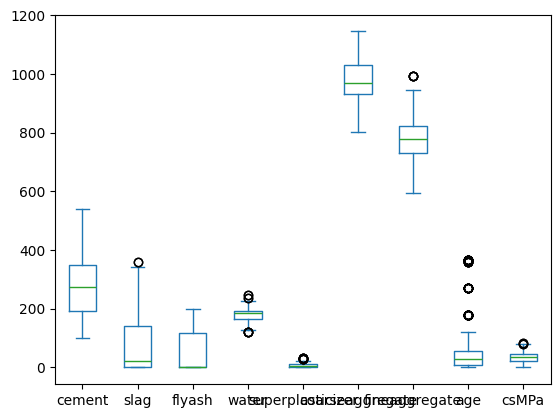

In [8]:
df.plot.box()

In [9]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
IQR  = 142.95 - 0.0
upper_limit = 142.95 + 1.5 * IQR
lower_limit = 0.0 - 1.5 *IQR
print("IQR = ", IQR)
print('UPPER_LIMIT = ', upper_limit)
print("LOWER_LIMIT = ", lower_limit)

IQR =  142.95
UPPER_LIMIT =  357.375
LOWER_LIMIT =  -214.42499999999998


In [11]:
new_df = df.copy()
new_df['slag'] = np.where(
    new_df['slag'] > upper_limit,
    upper_limit,
    np.where(
        new_df['slag'] < lower_limit,
        lower_limit,
        new_df['slag']
    )
)

In [12]:
new_df.shape

(1030, 9)

<Axes: >

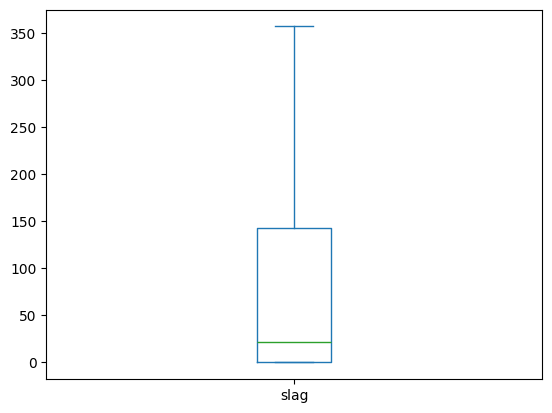

In [13]:
new_df['slag'].plot.box()

In [14]:
IQR  = 192 - 164.90
upper_limit = 192 + 1.5 * IQR
lower_limit = 164.90 - 1.5 *IQR
print("IQR = ", IQR)
print('UPPER_LIMIT = ', upper_limit)
print("LOWER_LIMIT = ", lower_limit)

IQR =  27.099999999999994
UPPER_LIMIT =  232.64999999999998
LOWER_LIMIT =  124.25000000000001


In [15]:

new_df['water'] = np.where(
    new_df['water'] > upper_limit,
    upper_limit,
    np.where(
        new_df['water'] < lower_limit,
        lower_limit,
        new_df['water']
    )
)

<Axes: >

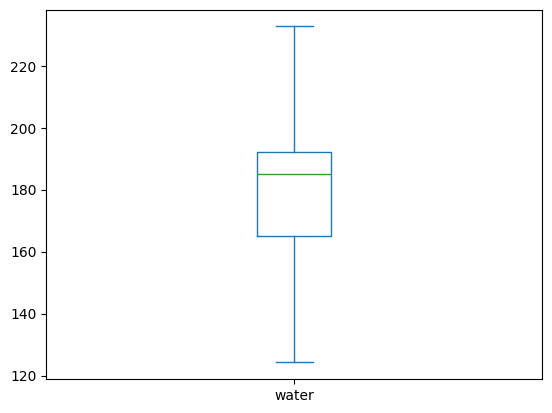

In [16]:
new_df['water'].plot.box()

In [17]:
IQR  = 10.20 - 0.0
upper_limit = 10.20 + 1.5 * IQR
lower_limit = 0.0 - 1.5 *IQR
print("IQR = ", IQR)
print('UPPER_LIMIT = ', upper_limit)
print("LOWER_LIMIT = ", lower_limit)

IQR =  10.2
UPPER_LIMIT =  25.5
LOWER_LIMIT =  -15.299999999999999


In [18]:

new_df['superplasticizer'] = np.where(
    new_df['superplasticizer'] > upper_limit,
    upper_limit,
    np.where(
        new_df['superplasticizer'] < lower_limit,
        lower_limit,
        new_df['superplasticizer']
    )
)

<Axes: >

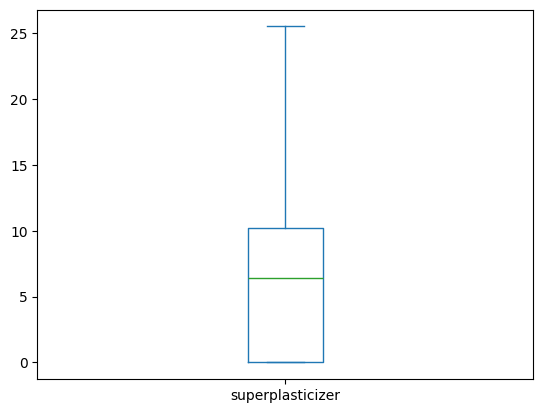

In [19]:
new_df['superplasticizer'].plot.box()

In [20]:
IQR  = 56.00 - 7.0
upper_limit = 56.00 + 1.5 * IQR
lower_limit = 7.0 - 1.5 *IQR
print("IQR = ", IQR)
print('UPPER_LIMIT = ', upper_limit)
print("LOWER_LIMIT = ", lower_limit)

IQR =  49.0
UPPER_LIMIT =  129.5
LOWER_LIMIT =  -66.5


In [21]:

new_df['age'] = np.where(
    new_df['age'] > upper_limit,
    upper_limit,
    np.where(
        new_df['age'] < lower_limit,
        lower_limit,
        new_df['age']
    )
)

<Axes: >

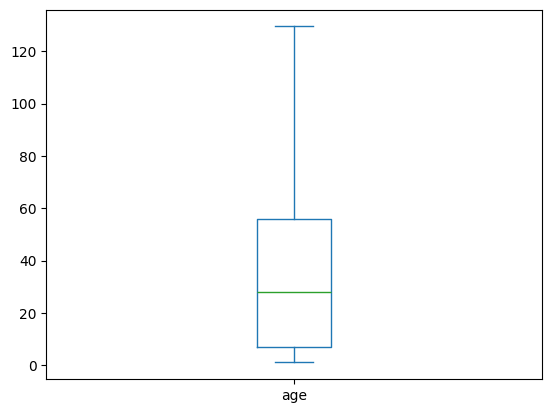

In [22]:
new_df['age'].plot.box()

In [23]:
new_df['fineaggregate'].describe()

count    1030.000000
mean      773.580485
std        80.175980
min       594.000000
25%       730.950000
50%       779.500000
75%       824.000000
max       992.600000
Name: fineaggregate, dtype: float64

<Axes: xlabel='fineaggregate', ylabel='Density'>

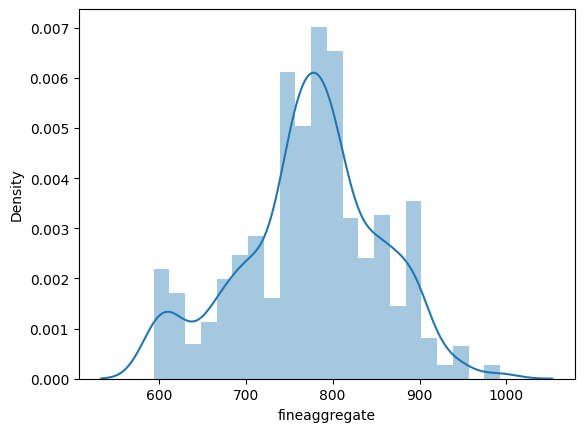

In [24]:
sns.distplot(new_df['fineaggregate'])

<Axes: ylabel='fineaggregate'>

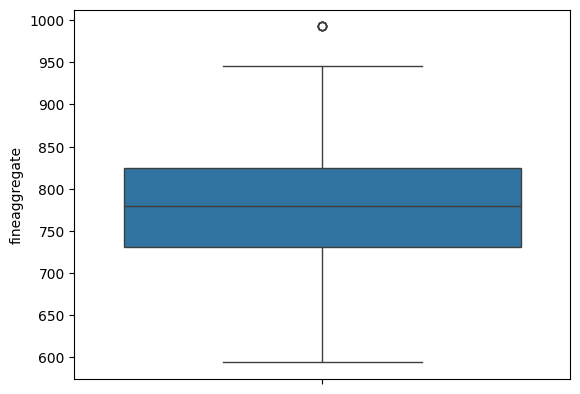

In [25]:
sns.boxplot(new_df['fineaggregate'])

In [26]:
upper_limit = new_df['fineaggregate'].quantile(0.995)
upper_limit

945.0

In [27]:
lower_limit = new_df['fineaggregate'].quantile(0.005)
lower_limit

594.0

In [28]:
new_df = df[(new_df['fineaggregate'] <= 945) & (new_df['fineaggregate'] >= 594.0)]

In [29]:
new_df['fineaggregate'].describe()

count    1025.000000
mean      772.512098
std        78.893641
min       594.000000
25%       730.000000
50%       779.300000
75%       822.200000
max       945.000000
Name: fineaggregate, dtype: float64

In [30]:
df['fineaggregate'].describe()

count    1030.000000
mean      773.580485
std        80.175980
min       594.000000
25%       730.950000
50%       779.500000
75%       824.000000
max       992.600000
Name: fineaggregate, dtype: float64

<Axes: xlabel='fineaggregate', ylabel='Density'>

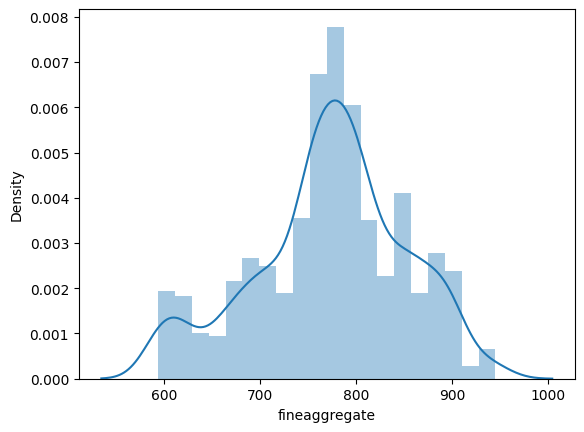

In [31]:
sns.distplot(new_df['fineaggregate'])

<Axes: >

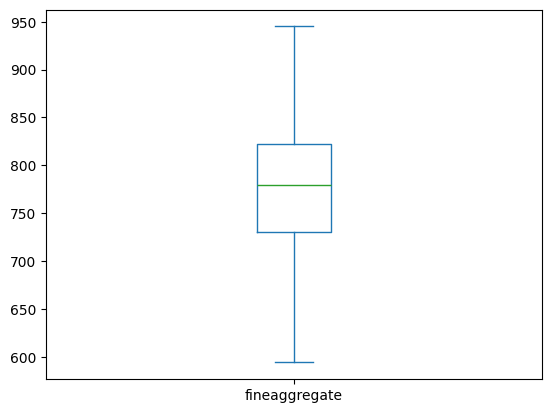

In [32]:
new_df['fineaggregate'].plot.box()

In [33]:
new_df['csMPa'].describe()

count    1025.000000
mean       35.744780
std        16.691218
min         2.330000
25%        23.690000
50%        34.290000
75%        45.900000
max        82.600000
Name: csMPa, dtype: float64

<Axes: xlabel='csMPa', ylabel='Density'>

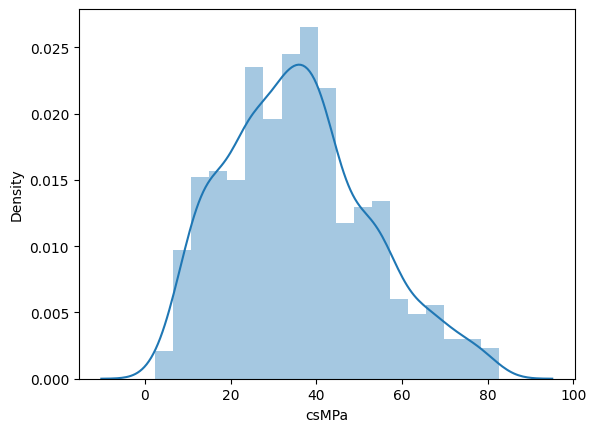

In [34]:
sns.distplot(new_df['csMPa'])

<Axes: >

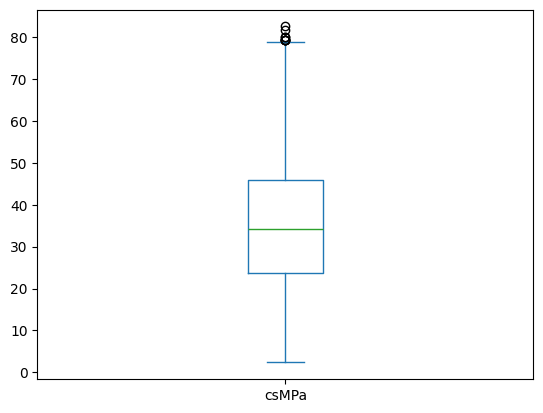

In [35]:
new_df['csMPa'].plot.box()

In [36]:
upper_limit = new_df['csMPa'].quantile(0.99)
upper_limit

77.3

In [37]:
lower_limit = new_df['csMPa'].quantile(0.01)
lower_limit

6.8848

In [38]:
new_df = df[(df['csMPa'] >= 77.3) | (df['csMPa'] <= 6.88)]

<Axes: >

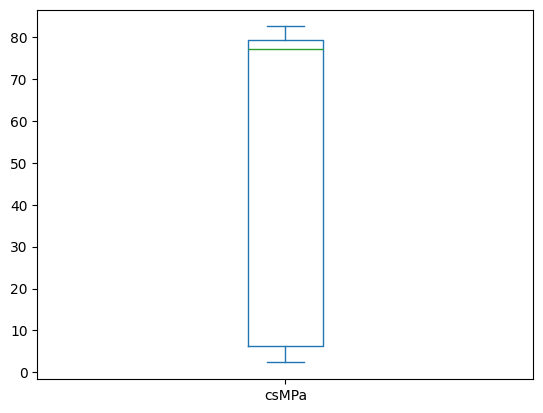

In [39]:
new_df['csMPa'].plot.box()

In [43]:
X = new_df.drop("csMPa", axis=1)

In [44]:
y = new_df['csMPa']

In [45]:
X.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
152,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56
155,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56
157,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56


In [46]:
y.head()

0      79.99
152    77.30
153    80.20
155    77.30
157    77.30
Name: csMPa, dtype: float64

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
X = scaler.fit_transform(X)

In [50]:
y.shape

(25,)

In [51]:
X.shape

(25, 8)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lr = LinearRegression()

In [56]:
lr.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = lr.predict(X_test)

In [58]:
from sklearn.metrics import r2_score, mean_squared_error

In [59]:
r2 = r2_score(y_test, y_pred)

In [60]:
mean_squared_error(y_test, y_pred)

132.77928986869512

In [61]:
adj_r2 = 1 - (((1-r2)*(len(X_test)-1))/(len(X_test)-7-1))

In [62]:
adj_r2

1.1372332586809508

In [63]:
r2

0.8970750559892868